In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy

In [7]:

def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes=load_dataset()

In [3]:
#reshape dataset
#train data
train_set_x = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
train_set_y = train_set_y_orig.reshape(1,train_set_y_orig.shape[0])
    
#test data
test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
test_set_y = test_set_y_orig.reshape(1,test_set_y_orig.shape[0])

#normalize data
train_set_x=train_set_x/255
test_set_x=test_set_x/255


In [8]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(train_set_x.T, train_set_y.T.ravel())

Y_prediction = lr.predict(test_set_x.T)
Y_prediction_t = lr.predict(train_set_x.T)
print('--------------------------------------------')

print('accuracy LogisticRegression')

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_t - train_set_y)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - test_set_y)) * 100))

--------------------------------------------
accuracy LogisticRegression
train accuracy: 100.0 %
test accuracy: 72.0 %


C:\Users\Ramadan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from PIL import Image
import matplotlib.image as mpimg
  
fname= "cat_img2.jpg"   
   
image = np.array(mpimg.imread(fname))
my_image1 = image.reshape(1, image.shape[0]*image.shape[1]*3).T
Y_prediction1 = lr.predict(my_image1.T)

print("your algorithm predicts a \"" + classes[int(np.squeeze(Y_prediction1)),].decode("utf-8") +  "\" picture.")
print('----------------------------------------------')

your algorithm predicts a "cat" picture.
----------------------------------------------


In [22]:
def sigmoid(input):
    s = 1/(1 + np.exp(-input))
    
    return s


In [15]:
def initialize_with_zeros(dim):   
    w = np.zeros((dim, 1))
    b = 0.0
    
    return w, b

In [16]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION 

    A = sigmoid(np.dot(w.T, X) + b)                                           # compute activation
    cost = - 1/m * np.sum((Y * np.log(A) + (1 - Y) * np.log(1 - A)))          # compute cost
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    
    dw =  1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A-Y)
    
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [17]:
#optimize FUNCTION

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        #updates
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [18]:
def predict(w, b, X):    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    
    ### make prediction
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    
    return Y_prediction


In [19]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.7, print_cost = False):
    
    #initialize
    w, b = initialize_with_zeros(X_train.shape[0])  # where to get dimension?

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test accuracy
    print('accuracy Nural Network')
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)


accuracy Nural Network
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


your algorithm predicts a "non-cat" picture.


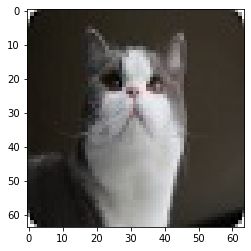

In [20]:
#test on new image
from PIL import Image
import matplotlib.image as mpimg
  
fname= "cat_img2.jpg"   
   
image = np.array(mpimg.imread(fname))
my_image = image.reshape(1, image.shape[0]*image.shape[1]*3).T

my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")